# Customer Segmentation Analysis

Customer segmentation is the process of uncovering valuable insights about a business's customer base based on their interactions with the company. Typically, this involves analyzing their purchase behavior and patterns. We explore various methods to leverage this information effectively.

Imagine you own a mall and want to understand your customers better, identifying those who can be easily converted into loyal shoppers. This valuable information can be provided to the marketing team to plan targeted strategies accordingly.

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [26]:
data = pd.read_csv("Mall_Customers.csv")
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [27]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [29]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [30]:
!pip install missingno

In [31]:
import missingno as mn   # "missingno" is used to visualize missing data in dataset 

<Axes: >

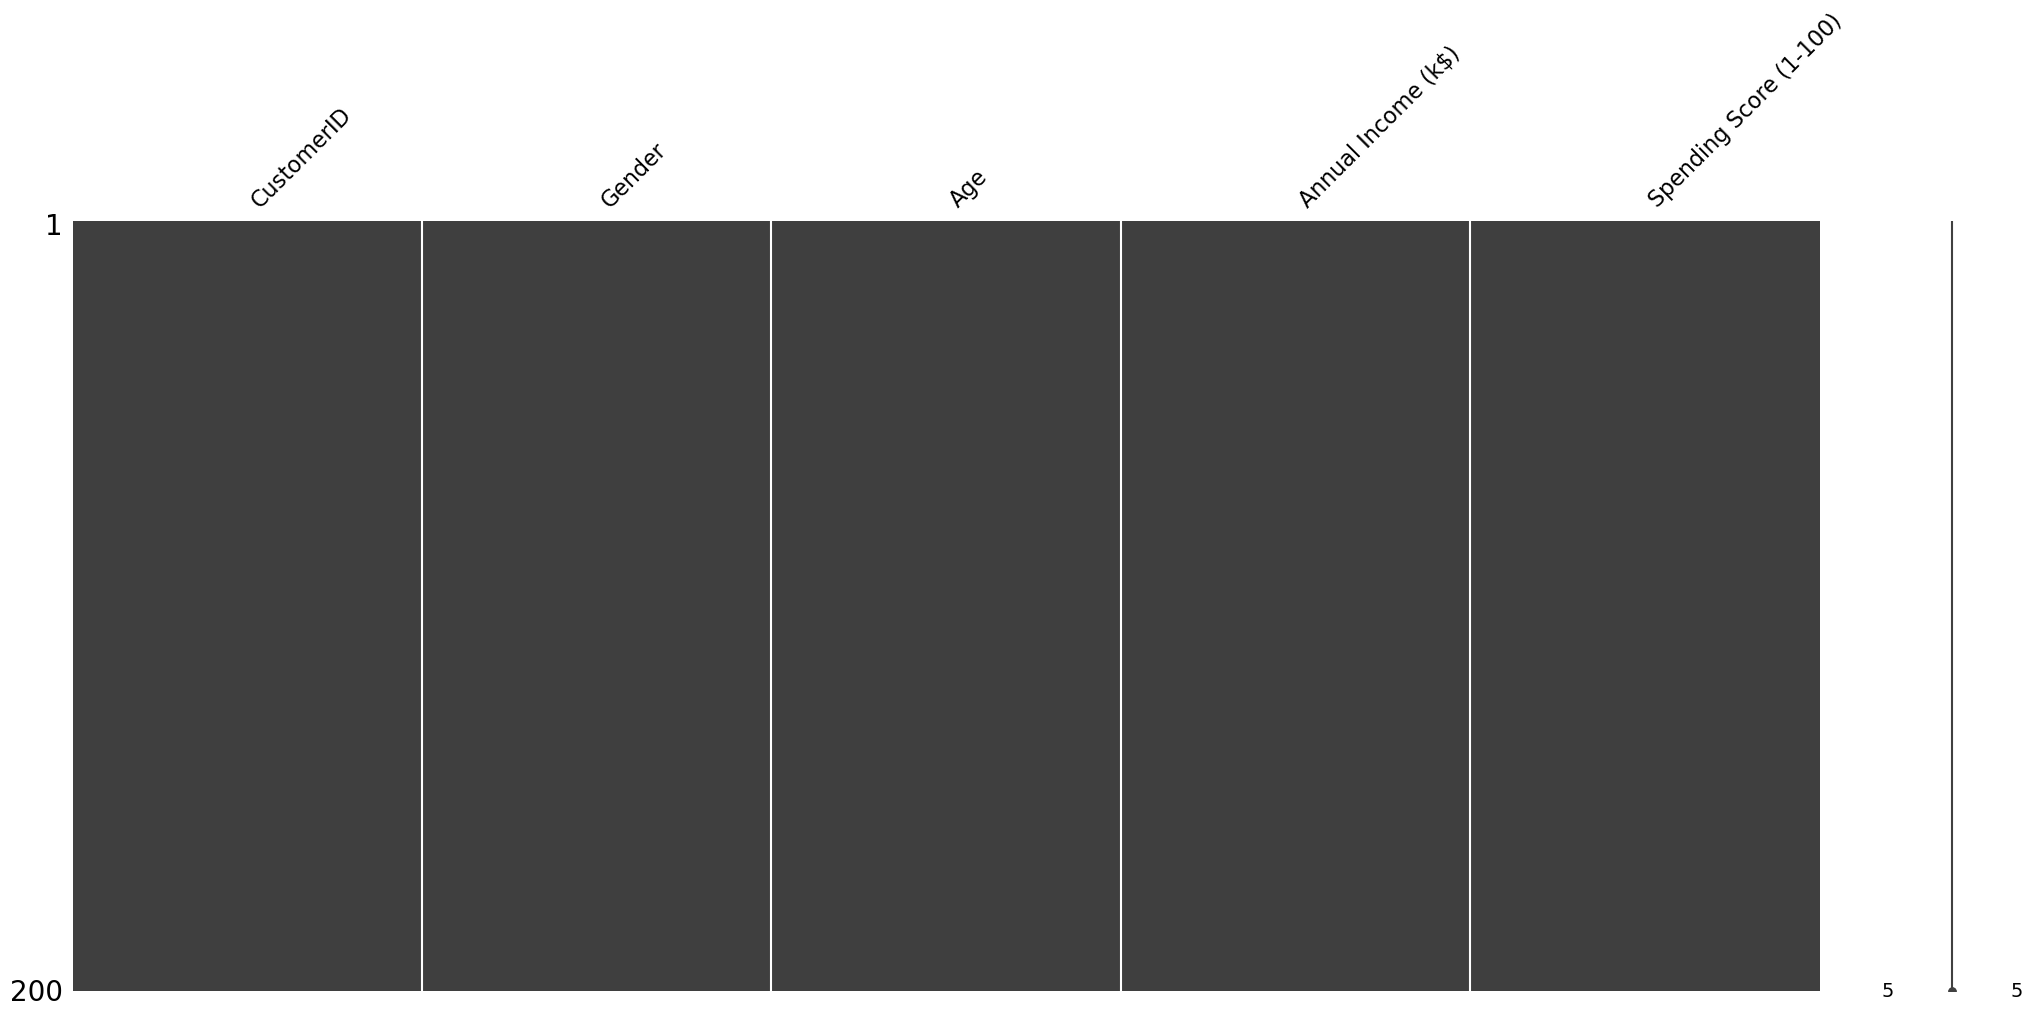

In [32]:
mn.matrix(data)    # as the visualize displays that there is no missing data in it

# Data visualization & EDA

In [33]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_23956\272615144.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Age'])  # Create a distribution plot for the 'Age' column
C:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_23956\272615144.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-le

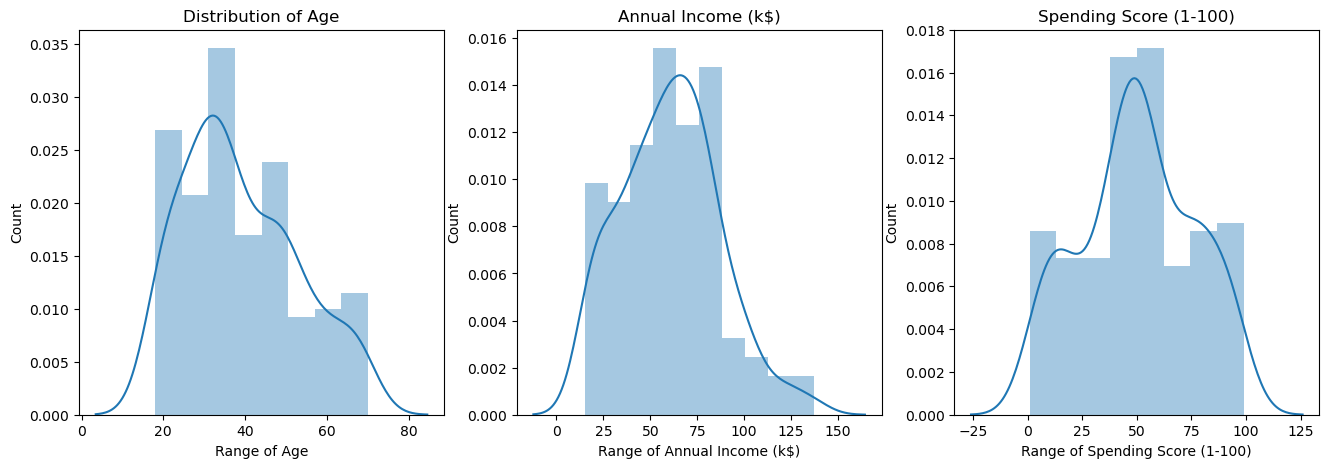

In [34]:
plt.figure(figsize=(16, 5))  # Create a figure with a specific size (width: 16 inches, height: 5 inches)

# First subplot
plt.subplot(1, 3, 1)  # Create a subplot in a 1 row by 3 columns grid, and activate the first subplot
sns.distplot(data['Age'])  # Create a distribution plot for the 'Age' column
plt.title('Distribution of Age')  # Set the title of the first subplot
plt.xlabel('Range of Age')  # Set the x-axis label of the first subplot
plt.ylabel('Count')  # Set the y-axis label of the first subplot

# Second subplot
plt.subplot(1, 3, 2)  # Create a subplot in a 1 row by 3 columns grid, and activate the second subplot
sns.distplot(data['Annual Income (k$)'])  # Create a distribution plot for the 'Annual Income (k$)' column
plt.title('Annual Income (k$)')  # Set the title of the second subplot
plt.xlabel('Range of Annual Income (k$)')  # Set the x-axis label of the second subplot
plt.ylabel('Count')  # Set the y-axis label of the second subplot

# Third subplot
plt.subplot(1, 3, 3)  # Create a subplot in a 1 row by 3 columns grid, and activate the third subplot
sns.distplot(data['Spending Score (1-100)'])  # Create a distribution plot for the 'Spending Score (1-100)' column
plt.title('Spending Score (1-100)')  # Set the title of the third subplot
plt.xlabel('Range of Spending Score (1-100)')  # Set the x-axis label of the third subplot
plt.ylabel('Count')  # Set the y-axis label of the third subplot

plt.show()  # Display the figure containing all the subplots

#### 1.the first graph shows that from age 18-70 is the range of age is spending money or purchasing and from age 25-35 has highest spend 
#### 2. the second graph the annual income range from 20k-35k most have income in range 60k-75k 
#### 3. the third graph range of spending score 1-100 have highest spending score is from 35-60 

# Now check how much is Female and How much is Male Customers

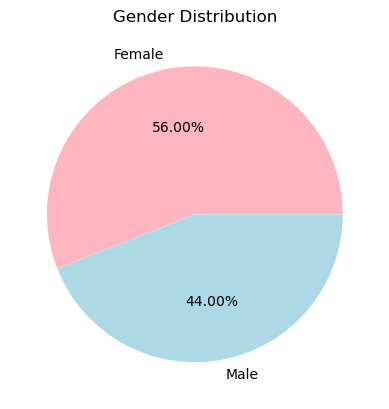

In [35]:
df = data.groupby('Gender').size() 
#his line groups the data by the 'Gender' column and counts the number of occurrences of each gender. The result is a Series with the gender counts

df.plot(kind='pie', subplots=True,
        colors = ['lightpink', 'lightblue'],
        explode = [0, 0.001],
        labels = ['Female', 'Male'],
        autopct = '%.2f%%')
plt.title('Gender Distribution')
plt.show()
# #kind='pie': Specifies that the plot should be a pie chart.
# subplots=True: Ensures that the pie chart is plotted as a subplot. This is useful when you want to plot multiple charts in a single figure. Here, it is used to create a single pie chart.
# colors=['lightpink', 'lightblue']: Specifies the colors of the pie slices. The first color corresponds to 'Female' and the second to 'Male'.
# explode=[0, 0.001]: Specifies how much to "explode" or separate the slices from the center. Here, the 'Male' slice is slightly exploded (moved outwards) by 0.001, while the 'Female' slice remains in place.
# labels=['Male', 'Female']: Specifies the labels for the slices. These labels will be displayed on the pie chart.
# autopct='%.2f%%': Formats the percentage labels on the pie chart slices to show two decimal places.

### the piechart shows that the 56% female are spending more or purchasing more so, we can take a decison based upon this and increase sale of that products.

array([[<Axes: title={'center': 'CustomerID'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Annual Income (k$)'}>,
        <Axes: title={'center': 'Spending Score (1-100)'}>]], dtype=object)

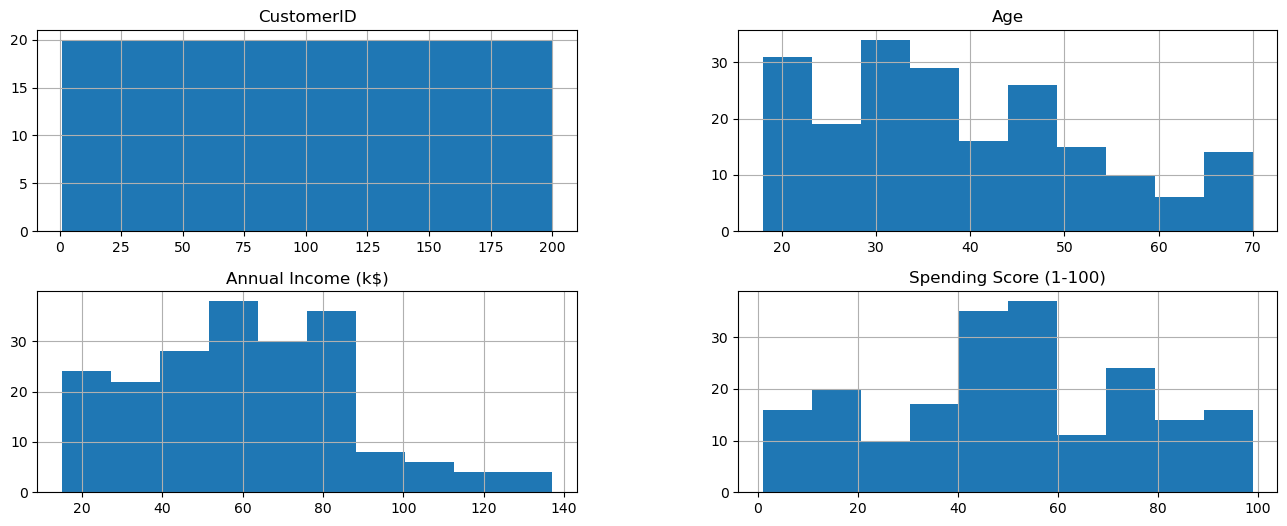

In [36]:
d =data.hist(figsize = (16,6))
d

C:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf

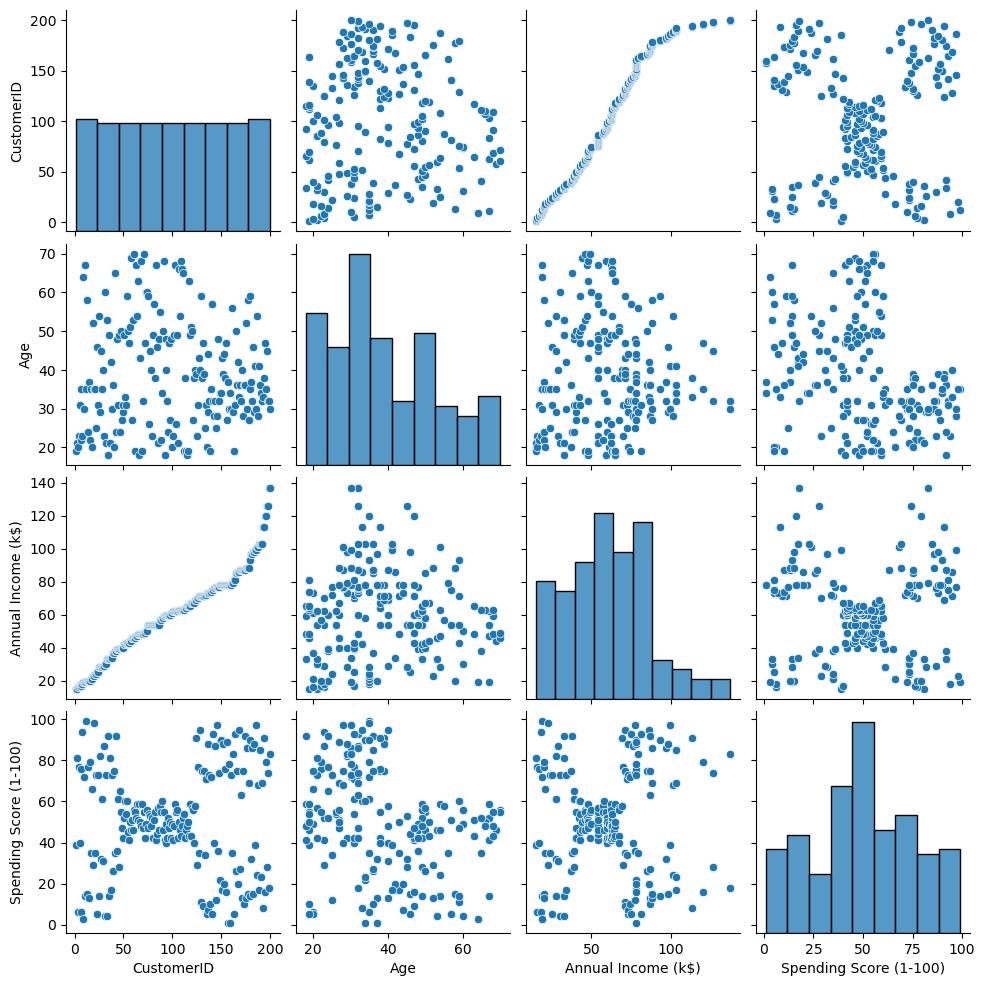

In [37]:
sns.pairplot(data)
plt.show()

C:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


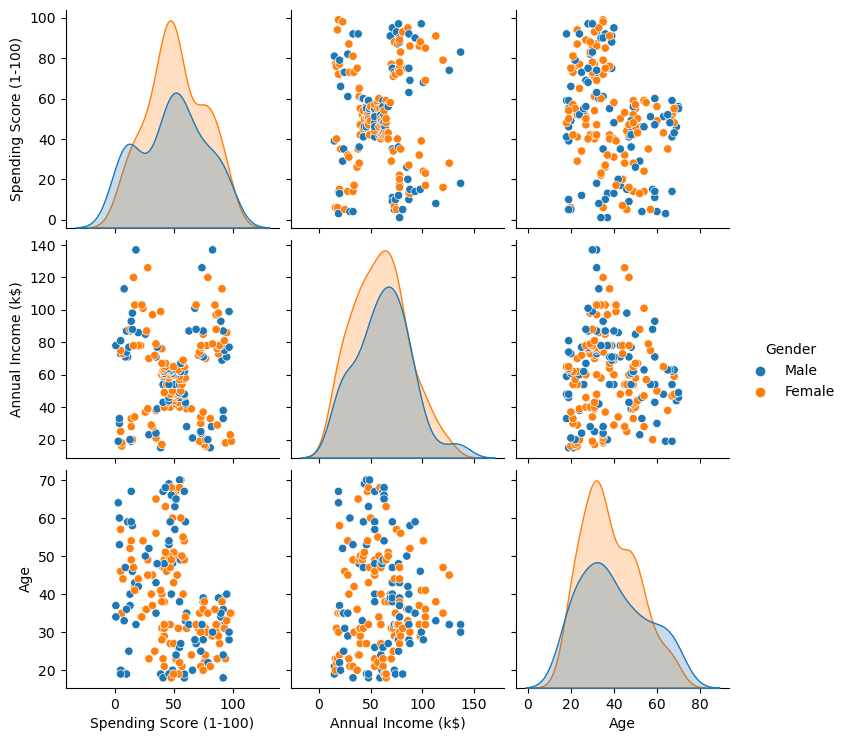

In [38]:
sns.pairplot(data, vars= ['Spending Score (1-100)' , 'Annual Income (k$)', 'Age'], hue='Gender')

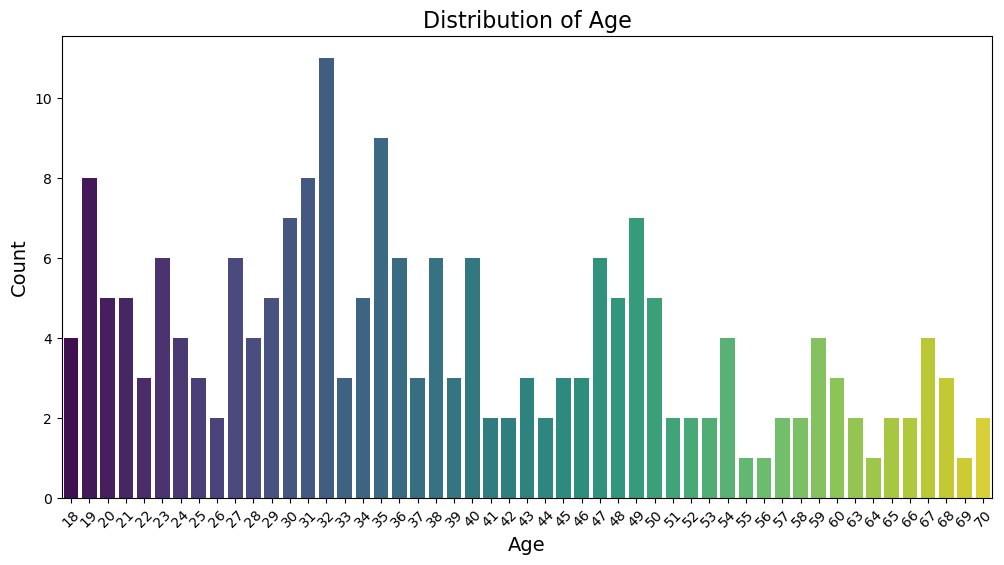

In [43]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Age', data=data, palette='viridis')
plt.title('Distribution of Age', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.show()

#### we prdedict that from above chart is that the the 32 has highest number of people shop and age 55,56 has lowest

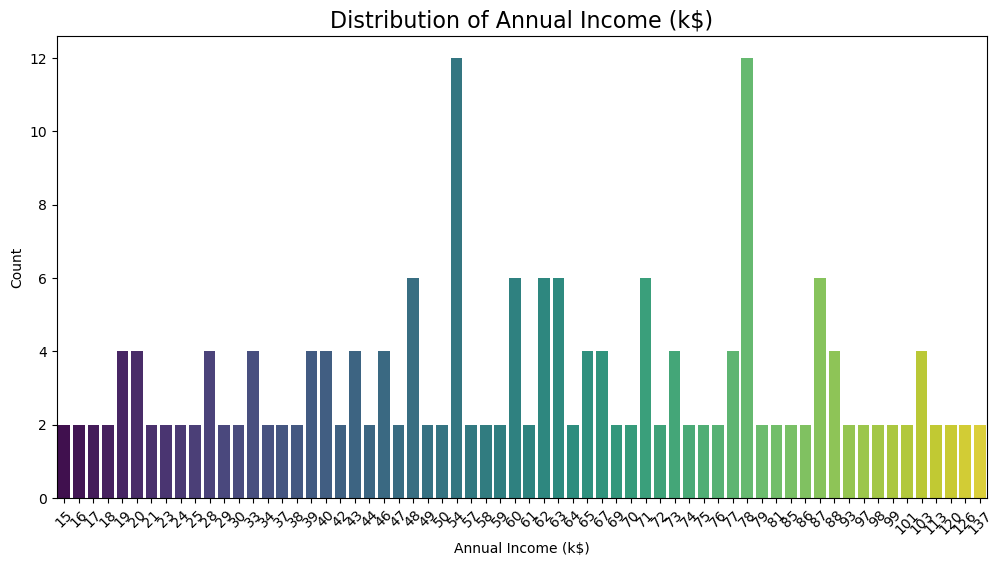

In [46]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Annual Income (k$)', data=data, palette='viridis')
plt.title('Distribution of Annual Income (k$)', fontsize=16)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

#### 54k has the the highest income people has who spend more

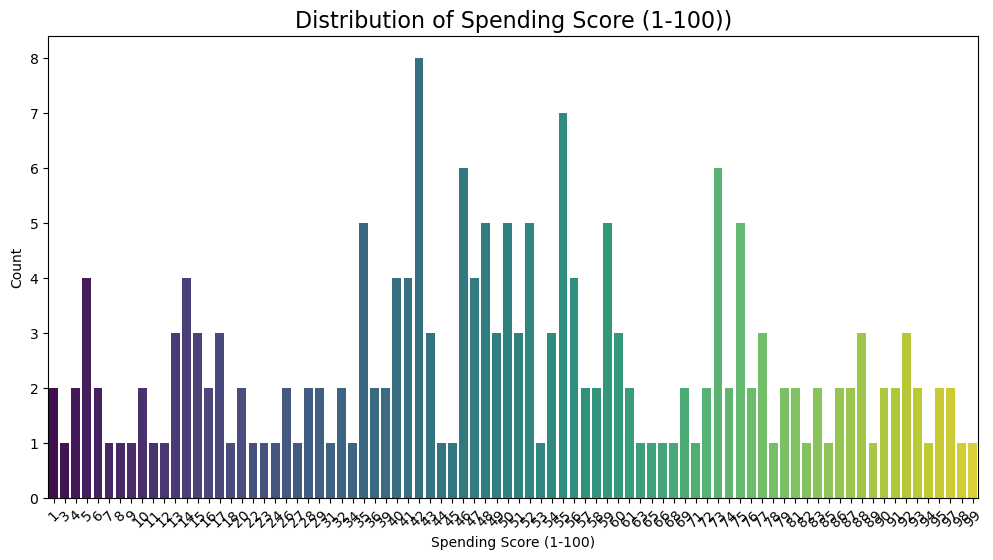

In [47]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Spending Score (1-100)', data=data, palette='viridis')
plt.title('Distribution of Spending Score (1-100))', fontsize=16)
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [49]:
!pip install dabl #Data Analysis Baseline Library

   ---------------------------------------- 0.0/567.0 kB ? eta -:--:--
    --------------------------------------- 10.2/567.0 kB ? eta -:--:--
    --------------------------------------- 10.2/567.0 kB ? eta -:--:--
   -- ------------------------------------ 30.7/567.0 kB 262.6 kB/s eta 0:00:03
   -- ------------------------------------ 41.0/567.0 kB 245.8 kB/s eta 0:00:03
   ----- --------------------------------- 81.9/567.0 kB 456.6 kB/s eta 0:00:02
   --------- ---------------------------- 143.4/567.0 kB 607.9 kB/s eta 0:00:01
   ------------- ------------------------ 194.6/567.0 kB 653.6 kB/s eta 0:00:01
   ---------------- --------------------- 245.8/567.0 kB 752.5 kB/s eta 0:00:01
   ------------------ ------------------- 276.5/567.0 kB 739.6 kB/s eta 0:00:01
   ------------------ ------------------- 276.5/567.0 kB 739.6 kB/s eta 0:00:01
   -------------------- ----------------- 307.2/567.0 kB 655.5 kB/s eta 0:00:01
   ------------------------ ------------- 358.4/567.0 kB 696.3 kB

In [51]:
import dabl

Target looks like regression


C:\anaconda3\Lib\site-packages\dabl\plot\supervised.py:214: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medians = X_new.groupby(col)[target_col].median()
C:\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


[<Axes: title={'center': 'Target distribution'}, xlabel='Spending Score (1...', ylabel='frequency'>,
 array([[<Axes: title={'center': 'F=-3.45E-01'}, xlabel='Age', ylabel='Spending Score (1...'>,
         <Axes: title={'center': 'F=7.84E-03'}, xlabel='Annual Income (k$)'>]],
       dtype=object),
 array([[<Axes: title={'center': 'F=6.22E-02'}, xlabel='Spending Score (1-100)', ylabel='Gender'>]],
       dtype=object)]

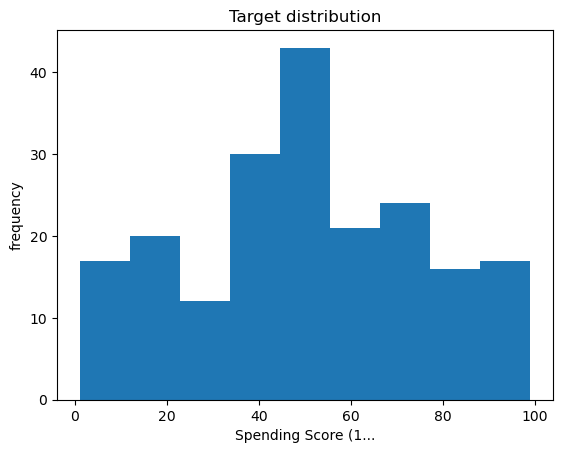

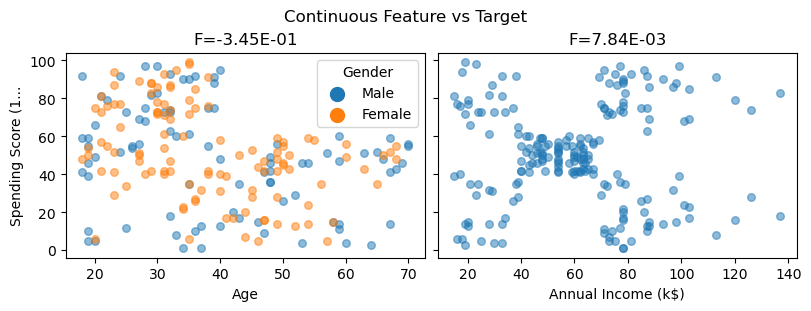

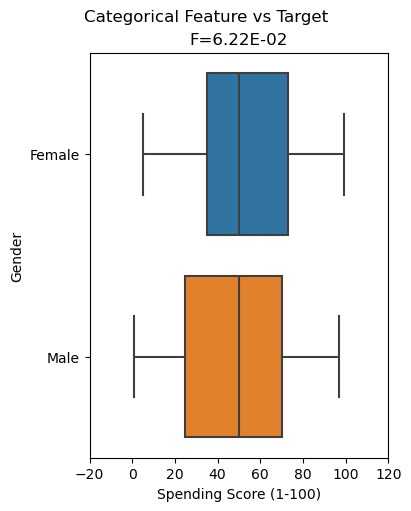

In [52]:
dabl.plot(data, target_col='Spending Score (1-100)')

Target looks like regression


C:\anaconda3\Lib\site-packages\dabl\plot\supervised.py:214: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medians = X_new.groupby(col)[target_col].median()
C:\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


[<Axes: title={'center': 'Target distribution'}, xlabel='Annual Income (k$)', ylabel='frequency'>,
 array([[<Axes: title={'center': 'F=1.98E-02'}, xlabel='Age', ylabel='Annual Income (k$)'>,
         <Axes: title={'center': 'F=7.84E-03'}, xlabel='Spending Score (1-100)'>]],
       dtype=object),
 array([[<Axes: title={'center': 'F=4.82E-03'}, xlabel='Annual Income (k$)', ylabel='Gender'>]],
       dtype=object)]

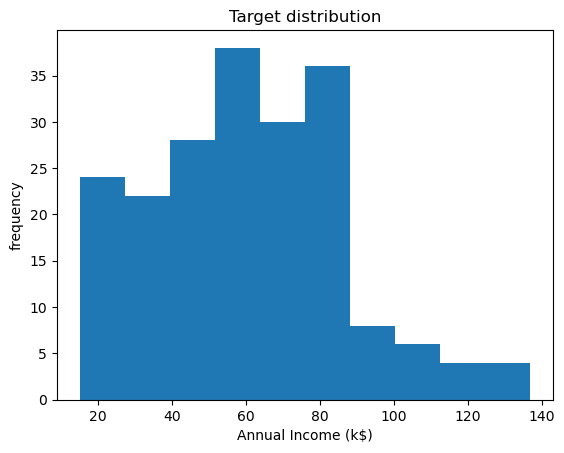

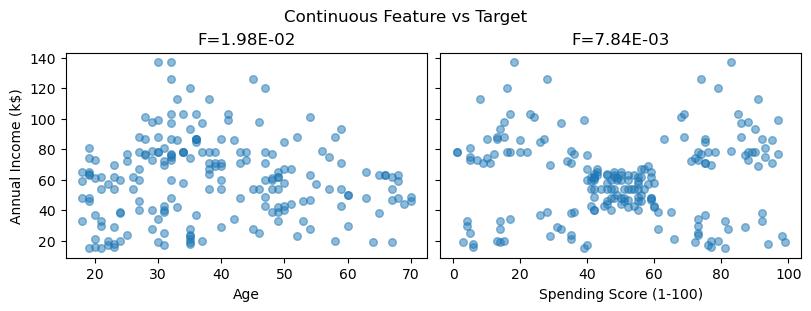

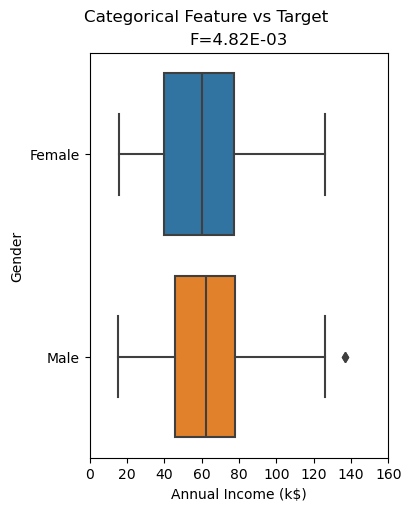

In [53]:
dabl.plot(data, target_col='Annual Income (k$)')

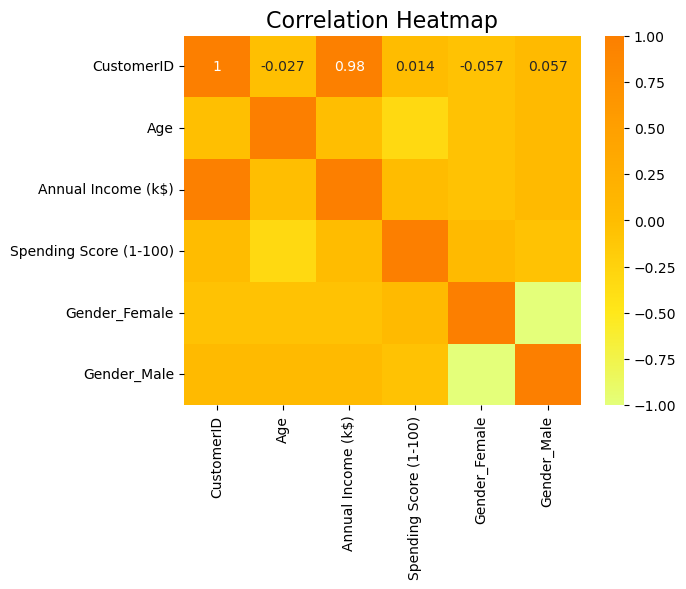

In [65]:
data_encoded = pd.get_dummies(data)

# Calculate the correlation matrix
corr_matrix = data_encoded.corr()

# Plot the heatmap
sns.heatmap(corr_matrix, cmap='Wistia', annot=True)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

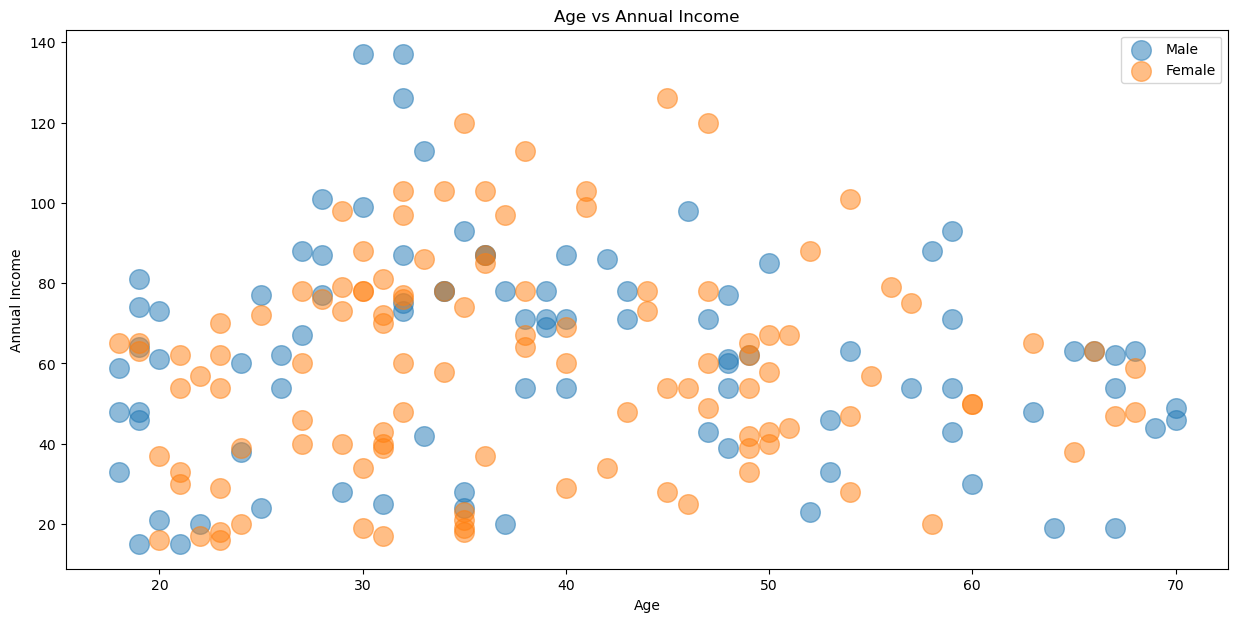

In [72]:
plt.figure(figsize = (15, 7))
for gender in ['Male', 'Female']:
    plt.scatter(x ='Age', y='Annual Income (k$)',
               data = data[data['Gender'] == gender],
               s = 200, alpha= 0.5,
               label = gender)
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.title('Age vs Annual Income')
plt.legend()
plt.show()
    
    

#### what we found from this is the age group of 31, 32 have highest income higher than 120k and 60+ have lowest income less than 20k 

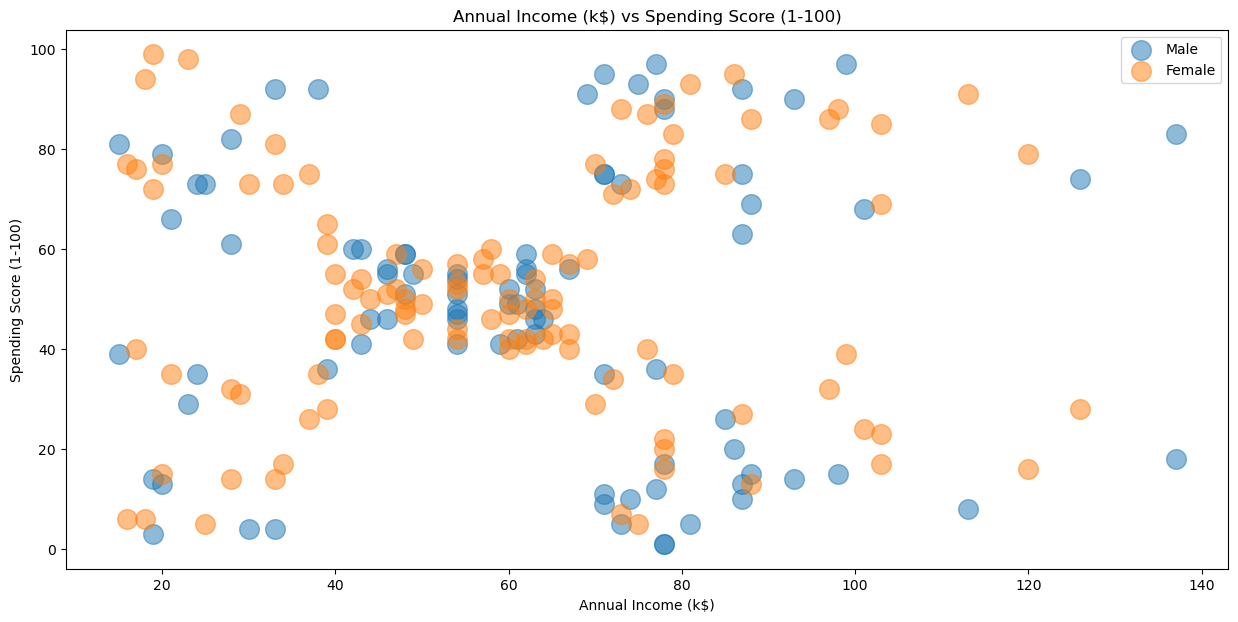

In [74]:
plt.figure(figsize = (15, 7))
for gender in ['Male', 'Female']:
    plt.scatter(x ='Annual Income (k$)', y='Spending Score (1-100)',
               data = data[data['Gender'] == gender],
               s = 200, alpha= 0.5,
               label = gender)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Annual Income (k$) vs Spending Score (1-100)')
plt.legend()
plt.show()
    

#### we predict tha the male have the highest income thna female but female spending score is more

## Model Building

In [75]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [77]:
x = data.iloc[:, [3,4]].values
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [90]:
from sklearn.cluster import KMeans


In [95]:
k = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init='k-means++', random_state=0)
    kmeans.fit(x)
    k.append(kmeans.inertia_)

C:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than avai

<!-- Initialize an empty list k:

python
Copy code
k = []
This list will store the inertia (sum of squared distances of samples to their closest cluster center) for each value of k.

Loop through a range of cluster values:

python
Copy code
for i in range(1, 11):
This loop iterates over potential numbers of clusters, from 1 to 10. You can adjust the range based on your specific needs.

Initialize and fit the KMeans model:

python
Copy code
kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
kmeans.fit(x)
n_clusters=i: Sets the number of clusters to the current value of i in the loop.
init='k-means++': Uses the k-means++ method for initialization to speed up convergence.
random_state=0: Ensures reproducibility by fixing the random seed.
kmeans.fit(x): Fits the KMeans model to the data x.
Append the inertia to the list k:

python
Copy code
k.append(kmeans.inertia_)
kmeans.inertia_: The inertia (sum of squared distances of samples to their closest cluster center) for the current number of clusters.
k.append(kmeans.inertia_): Adds the computed inertia to the list k. -->

Initialize an empty list k:

python
Copy code
k = []
This list will store the inertia (sum of squared distances of samples to their closest cluster center) for each value of k.

Loop through a range of cluster values:

python
Copy code
for i in range(1, 11):
This loop iterates over potential numbers of clusters, from 1 to 10. You can adjust the range based on your specific needs.

Initialize and fit the KMeans model:

python
Copy code
kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
kmeans.fit(x)
n_clusters=i: Sets the number of clusters to the current value of i in the loop.
init='k-means++': Uses the k-means++ method for initialization to speed up convergence.
random_state=0: Ensures reproducibility by fixing the random seed.
kmeans.fit(x): Fits the KMeans model to the data x.
Append the inertia to the list k:

python
Copy code
k.append(kmeans.inertia_)
kmeans.inertia_: The inertia (sum of squared distances of samples to their closest cluster center) for the current number of clusters.
k.append(kmeans.inertia_): Adds the computed inertia to the list k.

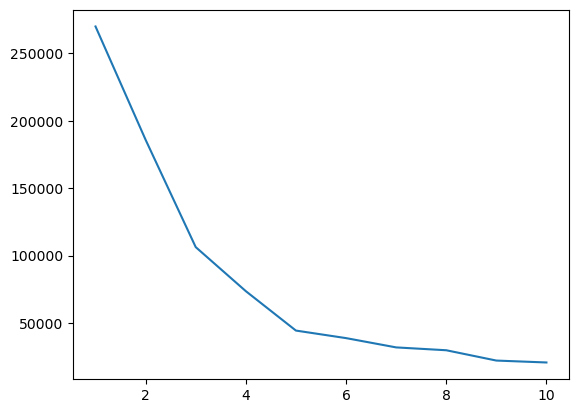

In [97]:
plt.plot(range(1, 11), k)
plt.show()

### here the after the 5 the graph decreases that means that is the elbow point is 5. so, we take number of cluster 5

In [98]:
model = KMeans(n_clusters = 5, init='k-means++', random_state=0)
y_kmeans = model.fit_predict(x)


C:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


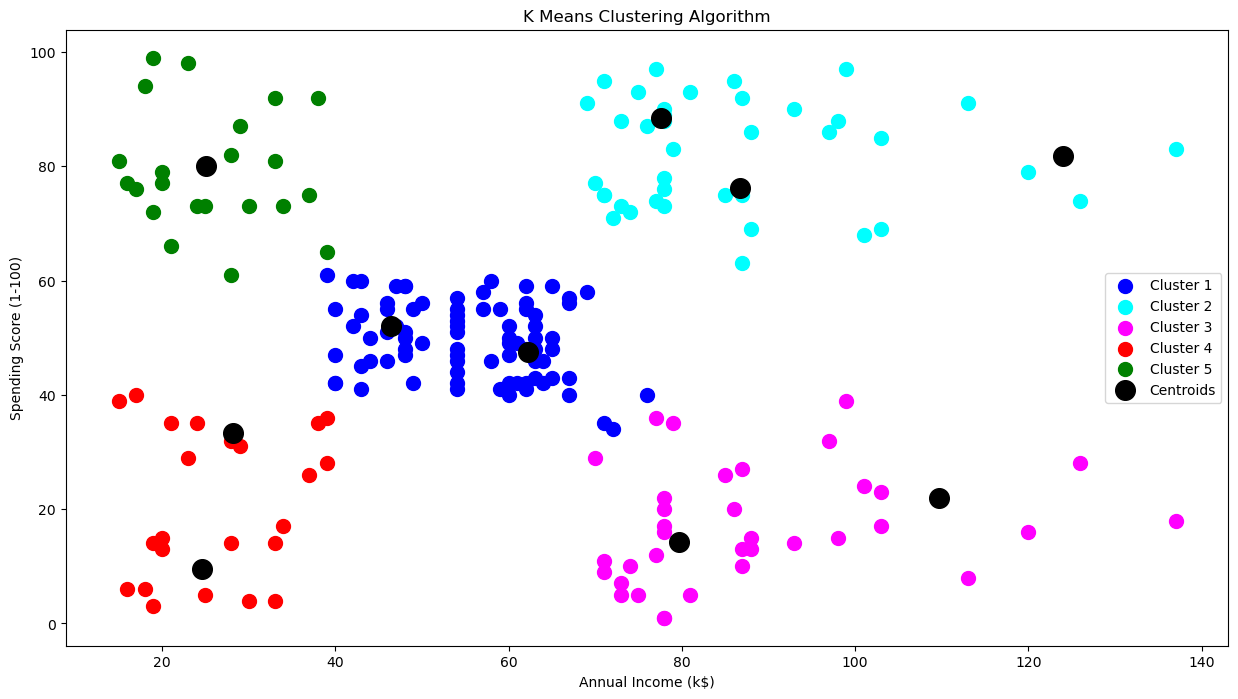

In [105]:
import matplotlib.pyplot as plt

# Assuming x is your dataset and y_kmeans is the cluster assignments

plt.figure(1, figsize=(15, 8))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s=100, c='blue', label='Cluster 1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s=100, c='cyan', label='Cluster 2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s=100, c='magenta', label='Cluster 3')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s=100, c='red', label='Cluster 4')
plt.scatter(x[y_kmeans == 4, 0], x[y_kmeans == 4, 1], s=100, c='green', label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='black', label='Centroids')

plt.title('K Means Clustering Algorithm')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()



so when the clusters get bigger the centroids also increses to accomodate the poins


In [106]:
# The provided chart shows the results of a K-means clustering analysis on a mall customer dataset. The clusters are color-coded and represent different segments of customers based on their annual income and spending score. Here's a detailed understanding of each cluster:
# <!-- Cluster 1 (Blue): -->

# <!-- Annual Income: Mostly around 40k-60k
# Spending Score: Around 40-60
# Interpretation: These are moderate spenders with moderate incomes.
# Cluster 2 (Cyan):

# Annual Income: High, approximately 60k-140k
# Spending Score: High, above 60
# Interpretation: These are high-income customers who spend a lot, making them high-value customers for targeted marketing.
# Cluster 3 (Green):

# Annual Income: Low, mostly below 40k
# Spending Score: High, above 60
# Interpretation: These customers spend a lot despite having a lower income, indicating a segment that values the mall's offerings highly.
# Cluster 4 (Red):

# Annual Income: Low, below 40k
# Spending Score: Low, below 40
# Interpretation: These are low-income customers with low spending, representing a segment that may need more affordable offerings or different marketing strategies.
# Cluster 5 (Magenta):

# Annual Income: High, approximately 70k-140k
# Spending Score: Low, below 40
# Interpretation: These customers have high incomes but low spending scores, suggesting potential untapped spending potential.
# The centroids (black points) represent the center of each cluster, indicating the average income and spending score for each segment. This analysis helps in understanding customer behavior and can guide targeted marketing efforts to maximize engagement and revenue.






#  -->